In [1]:
import os
import re
import math
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster

from tqdm.auto import tqdm
from sklearn.cluster import DBSCAN, KMeans
from sklearn.neighbors import NearestNeighbors

from utils.stop_detector import StopDetector

import utils

In [254]:
df = pd.read_csv("D:/Travel Time Prediction/df_stop_304.csv")   #1 2 4 7  32 41 9  3901 3902 304

In [255]:
df_road = pd.read_csv("D:/Travel Time Prediction/roaddb.csv")

In [256]:
df_road = df_road[df_road["rd"] == 304]
df_road.reset_index(drop=True,inplace=True)
df_road

,rid,rd,km,ptype,lat,lon,latx,lonx,angle
0,3395,304,0.00,100m,13.875917,100.596395,13.876,100.596,180
1,3395,304,0.10,100m,13.875194,100.596945,13.875,100.597,169
2,3395,304,0.20,100m,13.874387,100.597335,13.874,100.597,180
3,3395,304,0.30,100m,13.873587,100.597712,13.874,100.598,145
4,3395,304,0.40,100m,13.873126,100.598504,13.873,100.599,178
...,...,...,...,...,...,...,...,...,...
3513,5633,304,1.10,100m,14.951758,102.053692,14.952,102.054,179
3514,5633,304,1.20,100m,14.952656,102.053660,14.953,102.054,180
3515,5633,304,1.30,100m,14.953553,102.053619,14.954,102.054,173
3516,5633,304,1.40,100m,14.954443,102.053678,14.954,102.054,180


In [257]:
dbscan = utils.GPS_DBScan(df,df_road)

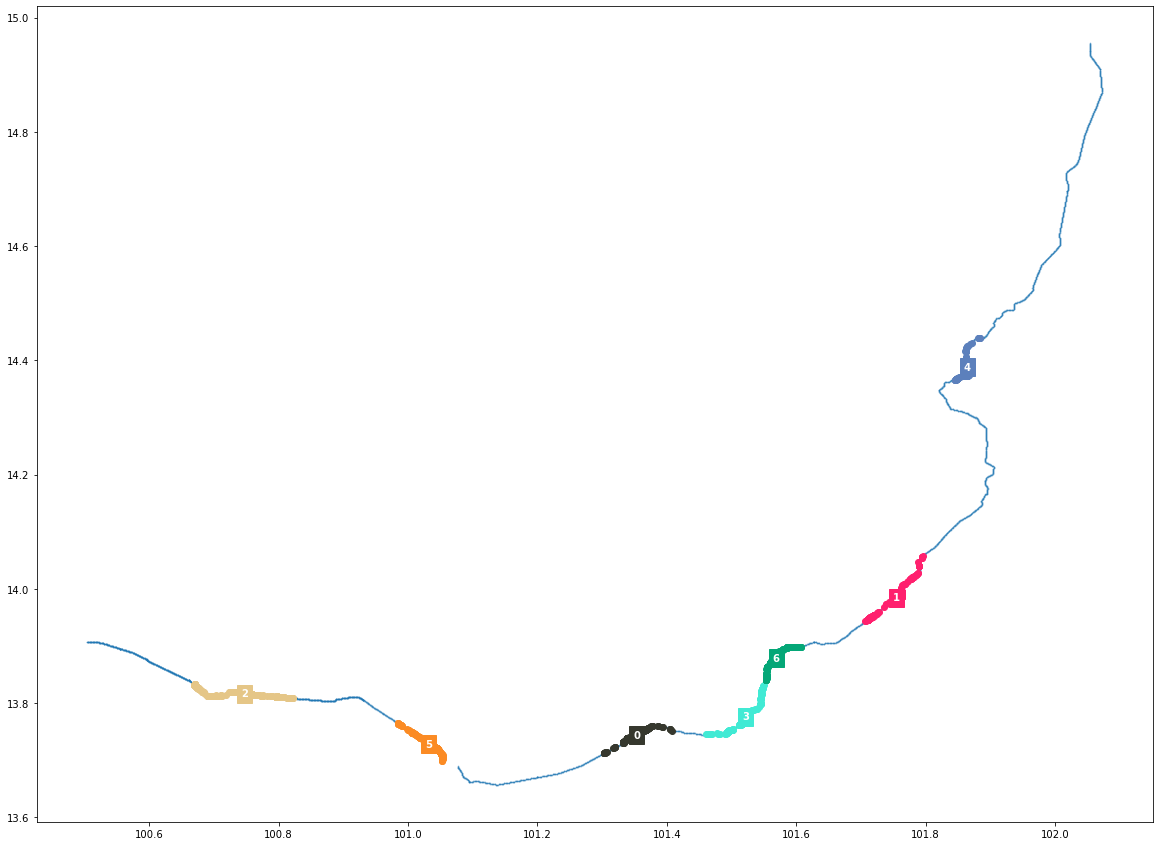

In [291]:
dbscan.dbscan(eps=0.04,min_samples=200)

In [292]:
dbscan.get_top_cluster()

3    497
1    448
2    369
5    259
0    245
4    244
6    220
Name: label, dtype: int64

In [103]:
temp = dbscan.get_df()

In [104]:
temp = temp[temp["label"]==0].reset_index(drop=True)

In [105]:
temp

,lat,lon,label
0,13.105887,100.920547,0
1,13.108018,100.924573,0
2,13.108370,100.926304,0
3,13.109250,100.928361,0
4,13.103333,100.912967,0
...,...,...,...
1858,13.113813,100.965515,0
1859,13.115093,100.967608,0
1860,13.117062,100.977715,0
1861,13.105160,100.919940,0
